In [3]:
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
from configuration import config
config.pythonpath_fix()



def pil_from_tensor(tensor):
    return transforms.ToPILImage()(tensor)
    
def tensor_from_pil(img):
    return transforms.ToTensor()(img)

def show_tensor(tensor_img):
    plt.imshow(pil_from_tensor(tensor_img), cmap='gray', vmin=0, vmax=255)

In [2]:
from deepscm.datasets.morphomnist.transforms import SetThickness, ImageMorphology
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms


image = dataset[3]["image"]

morph = ImageMorphology(image, scale=16)
tmp_morphed_img = np.float32(SetThickness(1)(morph)) 
morphed_img = torch.as_tensor(morph.downscale(tmp_morphed_img))
images = torch.cat([image, morphed_img])
grid = make_grid(images, m)
show_tensor(grid)



NameError: name 'dataset' is not defined

In [2]:
from ccbir.data import MorphoMNISTLikeDataModule
from ccbir.models import VQVAE
from torchvision.utils import make_grid
from torchvision import transforms

model = VQVAE.load_from_checkpoint(
    '/homes/mb8318/Documents/year4/ccbir/assets/synth-mnist-epoch=023-val_loss=0.0085513.ckpt')

dm = MorphoMNISTLikeDataModule()
dm.prepare_data()
dm.setup()
print(len(dm.mnist_train))
data_loader = dm.test_dataloader()
batch = next(iter(data_loader))
images = batch['image'][:16]
print(images.shape)
#show_tensor(make_grid(images, range=(0., 1.)))

reconstructions, _z_e, _z_q = model(images)
#reconstructions=torch.max(reconstructions, torch.tensor(0))
#reconstructions=torch.abs(reconstructions)
show_tensor(make_grid(torch.cat([images, reconstructions]), normalize=True, range=(-1,1)))

unprocessed=batch['image'][0]


ValueError: Usecols do not match columns, columns expected but not found: ['intensity']

In [4]:
import pandas as pd

df = pd.DataFrame(
    [
        [1, 2], 
        [3, 4]
    ],
    columns=['a', 'b']
)
df.iloc[0].to_dict()
#df.to_dict(orient='records')

{'a': 1, 'b': 2}

/homes/mb8318/Documents/year4/ccbir/submodules/deepscm/deepscm/datasets/morphomnist/__init__.py:80: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:189.)
  self.images = torch.as_tensor(images)


Generating train dataset for perturbation<class 'deepscm.morphomnist.perturb.Swelling'>


100%|##########| 60000/60000 [11:53<00:00, 84.04img/s] 


{'image': <PIL.Image.Image image mode=L size=28x28 at 0x7F9097CA2280>, 'label': tensor(0, dtype=torch.uint8), 'perturbations_args': {'strength': 3.0, 'radius': 7.0}}


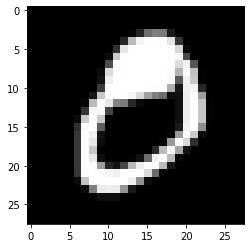

In [4]:
from ccbir.data.morphomnist.dataset import PerturbedMorphoMNIST, SwollenMorphoMNIST, FracturedMorphoMNIST
from deepscm.datasets.morphomnist import MorphoMNISTLike

test_data = MorphoMNISTLike(str(config.original_mnist_data_path), train=False)
test_data_perturbed = SwollenMorphoMNIST(train=True)
#train_data_perturbed = PerturbedMorphoMNIST(Swelling, perturbation_sampler=SwellingSampler(), train=True)

print(test_data_perturbed[1])
plt.imshow(test_data_perturbed[1]['image'], cmap='gray')

